In [1]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
np.random.seed(192)

In [2]:
df = pd.read_csv('drebin215dataset5560malware9476benign.csv')

/var/folders/6s/cwm9vzc106nd6dl62shcqh080000gn/T/ipykernel_52080/2225709299.py:1: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('drebin215dataset5560malware9476benign.csv')


In [3]:
df.shape

(15036, 216)

In [4]:
df.head()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,Ljava.net.URLDecoder,android.content.pm.Signature,android.telephony.SmsManager,READ_PHONE_STATE,getBinder,ClassLoader,Landroid.content.Context.registerReceiver,Ljava.lang.Class.getField,Landroid.content.Context.unregisterReceiver,GET_ACCOUNTS,RECEIVE_SMS,Ljava.lang.Class.getDeclaredField,READ_SMS,getCallingUid,Ljavax.crypto.spec.SecretKeySpec,android.intent.action.BOOT_COMPLETED,USE_CREDENTIALS,MANAGE_ACCOUNTS,android.content.pm.PackageInfo,KeySpec,TelephonyManager.getLine1Number,DexClassLoader,HttpGet.init,SecretKey,Ljava.lang.Class.getMethod,System.loadLibrary,android.intent.action.SEND,Ljavax.crypto.Cipher,WRITE_SMS,READ_SYNC_SETTINGS,AUTHENTICATE_ACCOUNTS,android.telephony.gsm.SmsManager,WRITE_HISTORY_BOOKMARKS,TelephonyManager.getSubscriberId,mount,INSTALL_PACKAGES,Runtime.getRuntime,CAMERA,Ljava.lang.Object.getClass,WRITE_SYNC_SETTINGS,READ_HISTORY_BOOKMARKS,Ljava.lang.Class.forName,INTERNET,android.intent.action.PACKAGE_REPLACED,Binder,android.intent.action.SEND_MULTIPLE,RECORD_AUDIO,IBinder,android.os.IBinder,createSubprocess,NFC,ACCESS_LOCATION_EXTRA_COMMANDS,URLClassLoader,WRITE_APN_SETTINGS,abortBroadcast,BIND_REMOTEVIEWS,android.intent.action.TIME_SET,READ_PROFILE,TelephonyManager.getDeviceId,MODIFY_AUDIO_SETTINGS,getCallingPid,READ_SYNC_STATS,BROADCAST_STICKY,android.intent.action.PACKAGE_REMOVED,android.intent.action.TIMEZONE_CHANGED,WAKE_LOCK,RECEIVE_BOOT_COMPLETED,RESTART_PACKAGES,Ljava.lang.Class.getPackage,chmod,Ljava.lang.Class.getDeclaredClasses,android.intent.action.ACTION_POWER_DISCONNECTED,android.intent.action.PACKAGE_ADDED,PathClassLoader,TelephonyManager.getSimSerialNumber,Runtime.load,TelephonyManager.getCallState,BLUETOOTH,READ_CALENDAR,READ_CALL_LOG,SUBSCRIBED_FEEDS_WRITE,READ_EXTERNAL_STORAGE,TelephonyManager.getSimCountryIso,sendMultipartTextMessage,PackageInstaller,VIBRATE,remount,android.intent.action.ACTION_SHUTDOWN,sendDataMessage,ACCESS_NETWORK_STATE,chown,HttpPost.init,Ljava.lang.Class.getClasses,SUBSCRIBED_FEEDS_READ,TelephonyManager.isNetworkRoaming,CHANGE_WIFI_MULTICAST_STATE,WRITE_CALENDAR,android.intent.action.PACKAGE_DATA_CLEARED,MASTER_CLEAR,HttpUriRequest,UPDATE_DEVICE_STATS,WRITE_CALL_LOG,DELETE_PACKAGES,GET_TASKS,GLOBAL_SEARCH,DELETE_CACHE_FILES,WRITE_USER_DICTIONARY,android.intent.action.PACKAGE_CHANGED,android.intent.action.NEW_OUTGOING_CALL,REORDER_TASKS,WRITE_PROFILE,SET_WALLPAPER,BIND_INPUT_METHOD,divideMessage,READ_SOCIAL_STREAM,READ_USER_DICTIONARY,PROCESS_OUTGOING_CALLS,CALL_PRIVILEGED,Runtime.exec,BIND_WALLPAPER,RECEIVE_WAP_PUSH,DUMP,BATTERY_STATS,ACCESS_COARSE_LOCATION,SET_TIME,android.intent.action.SENDTO,WRITE_SOCIAL_STREAM,WRITE_SETTINGS,REBOOT,BLUETOOTH_ADMIN,TelephonyManager.getNetworkOperator,/system/bin,MessengerService,BIND_DEVICE_ADMIN,WRITE_GSERVICES,IRemoteService,KILL_BACKGROUND_PROCESSES,SET_ALARM,ACCOUNT_MANAGER,/system/app,android.intent.action.CALL,STATUS_BAR,TelephonyManager.getSimOperator,PERSISTENT_ACTIVITY,CHANGE_NETWORK_STATE,onBind,Process.start,android.intent.action.SCREEN_ON,Context.bindService,RECEIVE_MMS,SET_TIME_ZONE,android.intent.action.BATTERY_OKAY,CONTROL_LOCATION_UPDATES,BROADCAST_WAP_PUSH,BIND_ACCESSIBILITY_SERVICE,ADD_VOICEMAIL,CALL_PHONE,ProcessBuilder,BIND_APPWIDGET,FLASHLIGHT,READ_LOGS,Ljava.lang.Class.getResource,defineClass,SET_PROCESS_LIMIT,android.intent.action.PACKAGE_RESTARTED,MOUNT_UNMOUNT_FILESYSTEMS,BIND_TEXT_SERVICE,INSTALL_LOCATION_PROVIDER,android.intent.action.CALL_BUTTON,android.intent.action.SCREEN_OFF,findClass,SYSTEM_ALERT_WINDOW,MOUNT_FORMAT_FILESYSTEMS,CHANGE_CONFIGURATION,CLEAR_APP_USER_DATA,intent.action.RUN,android.intent.action.SET_WALLPAPER,CHANGE_WIFI_STATE,READ_FRAME_BUFFER,ACCESS_SURFACE_FLINGER,Runtime.loadLibrary,BROADCAST_SMS,EXPAND_STATUS_BAR,INTERNAL_SYSTEM_WINDOW,android.intent.action.BATTERY_LOW,SET_ACTIVITY_WATCHER,WR

In [5]:
desc = pd.read_csv('datasetfeaturescategories.csv')

In [6]:
desc.shape

(215, 2)

In [7]:
desc

,transact,API call signature
0,onServiceConnected,API call signature
1,bindService,API call signature
2,attachInterface,API call signature
3,ServiceConnection,API call signature
4,android.os.Binder,API call signature
5,SEND_SMS,Manifest Permission
6,Ljava.lang.Class.getCanonicalName,API call signature
7,Ljava.lang.Class.getMethods,API call signature
8,Ljava.lang.Class.cast,API call signature
9,Ljava.net.URLDecoder,API call signature


In [8]:
desc['API call signature'].value_counts()

Manifest Permission    113
API call signature      72
Intent                  23
Commands signature       6
B=Benign; S=Malware      1
Name: API call signature, dtype: int64

In [9]:
req_feats = desc.loc[desc['API call signature'] == 'API call signature']['transact'].values

In [10]:
type(req_feats)

numpy.ndarray

In [11]:
cla = np.array('class')

In [12]:
updated_list=np.append(req_feats, cla)

In [13]:
type(updated_list)

numpy.ndarray

In [14]:
data = df[updated_list]

In [15]:
data.head()

,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,Ljava.net.URLDecoder,android.content.pm.Signature,android.telephony.SmsManager,getBinder,ClassLoader,Landroid.content.Context.registerReceiver,Ljava.lang.Class.getField,Landroid.content.Context.unregisterReceiver,Ljava.lang.Class.getDeclaredField,getCallingUid,Ljavax.crypto.spec.SecretKeySpec,android.content.pm.PackageInfo,KeySpec,TelephonyManager.getLine1Number,DexClassLoader,HttpGet.init,SecretKey,Ljava.lang.Class.getMethod,System.loadLibrary,android.intent.action.SEND,Ljavax.crypto.Cipher,android.telephony.gsm.SmsManager,TelephonyManager.getSubscriberId,Runtime.getRuntime,Ljava.lang.Object.getClass,Ljava.lang.Class.forName,Binder,IBinder,android.os.IBinder,createSubprocess,URLClassLoader,abortBroadcast,TelephonyManager.getDeviceId,getCallingPid,Ljava.lang.Class.getPackage,Ljava.lang.Class.getDeclaredClasses,PathClassLoader,TelephonyManager.getSimSerialNumber,Runtime.load,TelephonyManager.getCallState,TelephonyManager.getSimCountryIso,sendMultipartTextMessage,PackageInstaller,sendDataMessage,HttpPost.init,Ljava.lang.Class.getClasses,TelephonyManager.isNetworkRoaming,HttpUriRequest,divideMessage,Runtime.exec,TelephonyManager.getNetworkOperator,MessengerService,IRemoteService,SET_ALARM,ACCOUNT_MANAGER,TelephonyManager.getSimOperator,onBind,Process.start,Context.bindService,ProcessBuilder,Ljava.lang.Class.getResource,defineClass,findClass,Runtime.loadLibrary,class
0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,S
1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,S
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,S
3,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,1,1,1,0,1,1,0,1,0,1,0,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,S
4,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,S


In [16]:
data.shape

(15036, 73)

In [17]:
for col in data.columns:
    if (data[col].isnull().sum() > 0):
        print(col)

In [18]:
data['class'].value_counts()/len(data['class'])

B    0.630221
S    0.369779
Name: class, dtype: float64

**Malware detected is denoted by 1 and vis-a-vis**

In [19]:
data['class'] = np.where(data['class']=='B', 0, 1)

/var/folders/6s/cwm9vzc106nd6dl62shcqh080000gn/T/ipykernel_52080/4005843338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['class'] = np.where(data['class']=='B', 0, 1)


In [20]:
data.head()

,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,Ljava.net.URLDecoder,android.content.pm.Signature,android.telephony.SmsManager,getBinder,ClassLoader,Landroid.content.Context.registerReceiver,Ljava.lang.Class.getField,Landroid.content.Context.unregisterReceiver,Ljava.lang.Class.getDeclaredField,getCallingUid,Ljavax.crypto.spec.SecretKeySpec,android.content.pm.PackageInfo,KeySpec,TelephonyManager.getLine1Number,DexClassLoader,HttpGet.init,SecretKey,Ljava.lang.Class.getMethod,System.loadLibrary,android.intent.action.SEND,Ljavax.crypto.Cipher,android.telephony.gsm.SmsManager,TelephonyManager.getSubscriberId,Runtime.getRuntime,Ljava.lang.Object.getClass,Ljava.lang.Class.forName,Binder,IBinder,android.os.IBinder,createSubprocess,URLClassLoader,abortBroadcast,TelephonyManager.getDeviceId,getCallingPid,Ljava.lang.Class.getPackage,Ljava.lang.Class.getDeclaredClasses,PathClassLoader,TelephonyManager.getSimSerialNumber,Runtime.load,TelephonyManager.getCallState,TelephonyManager.getSimCountryIso,sendMultipartTextMessage,PackageInstaller,sendDataMessage,HttpPost.init,Ljava.lang.Class.getClasses,TelephonyManager.isNetworkRoaming,HttpUriRequest,divideMessage,Runtime.exec,TelephonyManager.getNetworkOperator,MessengerService,IRemoteService,SET_ALARM,ACCOUNT_MANAGER,TelephonyManager.getSimOperator,onBind,Process.start,Context.bindService,ProcessBuilder,Ljava.lang.Class.getResource,defineClass,findClass,Runtime.loadLibrary,class
0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,1,1,1,0,1,1,0,1,0,1,0,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [21]:
data['TelephonyManager.getSimCountryIso'].value_counts()

0    6994
0    5514
1    1330
1    1193
?       5
Name: TelephonyManager.getSimCountryIso, dtype: int64

In [22]:
data.shape

(15036, 73)

In [23]:
data.loc[data['TelephonyManager.getSimCountryIso']!='?'].shape

(15031, 73)

In [24]:
data['TelephonyManager.getSimCountryIso'] = pd.to_numeric(data['TelephonyManager.getSimCountryIso'], errors='coerce')

/var/folders/6s/cwm9vzc106nd6dl62shcqh080000gn/T/ipykernel_52080/3913896909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TelephonyManager.getSimCountryIso'] = pd.to_numeric(data['TelephonyManager.getSimCountryIso'], errors='coerce')


In [25]:
data.shape

(15036, 73)

In [26]:
data['TelephonyManager.getSimCountryIso'].value_counts()

0.0    12508
1.0     2523
Name: TelephonyManager.getSimCountryIso, dtype: int64

In [27]:
for col in data.columns:
    if (data[col].isnull().sum() > 0):
        print(col)

TelephonyManager.getSimCountryIso


In [28]:
data.dropna(inplace=True)

/var/folders/6s/cwm9vzc106nd6dl62shcqh080000gn/T/ipykernel_52080/1368182302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [29]:
data.shape

(15031, 73)

In [30]:
data['TelephonyManager.getSimCountryIso'].isnull().sum()

0

In [31]:
data.dtypes

onServiceConnected                               int64
bindService                                      int64
attachInterface                                  int64
ServiceConnection                                int64
android.os.Binder                                int64
Ljava.lang.Class.getCanonicalName                int64
Ljava.lang.Class.getMethods                      int64
Ljava.lang.Class.cast                            int64
Ljava.net.URLDecoder                             int64
android.content.pm.Signature                     int64
android.telephony.SmsManager                     int64
getBinder                                        int64
ClassLoader                                      int64
Landroid.content.Context.registerReceiver        int64
Ljava.lang.Class.getField                        int64
Landroid.content.Context.unregisterReceiver      int64
Ljava.lang.Class.getDeclaredField                int64
getCallingUid                                    int64
Ljavax.cry

In [32]:
data.corr()['class']

onServiceConnected                            -0.561036
bindService                                   -0.558808
attachInterface                               -0.551434
ServiceConnection                             -0.557568
android.os.Binder                             -0.553608
Ljava.lang.Class.getCanonicalName             -0.467567
Ljava.lang.Class.getMethods                   -0.436322
Ljava.lang.Class.cast                         -0.440908
Ljava.net.URLDecoder                          -0.444190
android.content.pm.Signature                  -0.435757
android.telephony.SmsManager                   0.435190
getBinder                                     -0.357871
ClassLoader                                   -0.402811
Landroid.content.Context.registerReceiver     -0.397588
Ljava.lang.Class.getField                     -0.392741
Landroid.content.Context.unregisterReceiver   -0.391268
Ljava.lang.Class.getDeclaredField             -0.367717
getCallingUid                                 -0

In [60]:
# setting the seed to ensure reproducibility of results
np.random.seed(192)
# y is the traget variable
y = data['class']
# X contains the input
X = data.drop(columns=['class'])
# Converting this categorical column to integer type
X['TelephonyManager.getSimCountryIso'] = X['TelephonyManager.getSimCountryIso'].astype(int)

In [84]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=192)

In [85]:
# remove constant and quasi-constant features

quasi_constant_feat = []

for feature in X_train.columns:
    # seeing the type of values present in each column
    predominant = (X_train[feature].value_counts()/np.float(
        len(X_train))).sort_values(ascending=False).values[
        0]
    # if a column is filled with same value 99.8% of the time, then those columns are quasi constant
    if predominant > 0.998:
        quasi_constant_feat.append(feature)
# quasi constant columns may reduce the accuracy of our model so removing them from input        
X_train.drop(columns=quasi_constant_feat, inplace=True)
X_test.drop(columns=quasi_constant_feat, inplace=True)

In [86]:
quasi_constant_feat

['Runtime.loadLibrary']

In [87]:
# remove duplicated features

duplicated_feat = []
for i in range(0, len(X_train.columns)):
    if i%10 == 0:
        # printing i to see where the loop is currently iterating
        print(i)
        
    col_1 = X_train.columns[i]
    for col_2 in X_train.columns[i+1:]:
        # if two columns are duplicates of each other, then storing the name of second columnin duplicated_feat
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
            
# dropping duplicated features            
X_train.drop(columns=duplicated_feat, inplace=True)
X_test.drop(columns=duplicated_feat, inplace=True)
X_train.shape, X_test.shape

0
10
20
30
40
50
60
70


((12024, 71), (3007, 71))

In [88]:
# remove correlated features to reduce the feature space

def correlation(dataset, threshold):
    # set of all the names of correlated columns
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # if two columns are correlated more than threshold value, then storing those columns
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
# the threshold value is 0.8
corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)))

# if two columns are correlated to each other more than 80%, then dropping one of them
X_train = X_train.drop(columns=corr_features)
X_test = X_test.drop(columns=corr_features)
X_train.shape, X_test.shape

correlated features:  10


((12024, 61), (3007, 61))

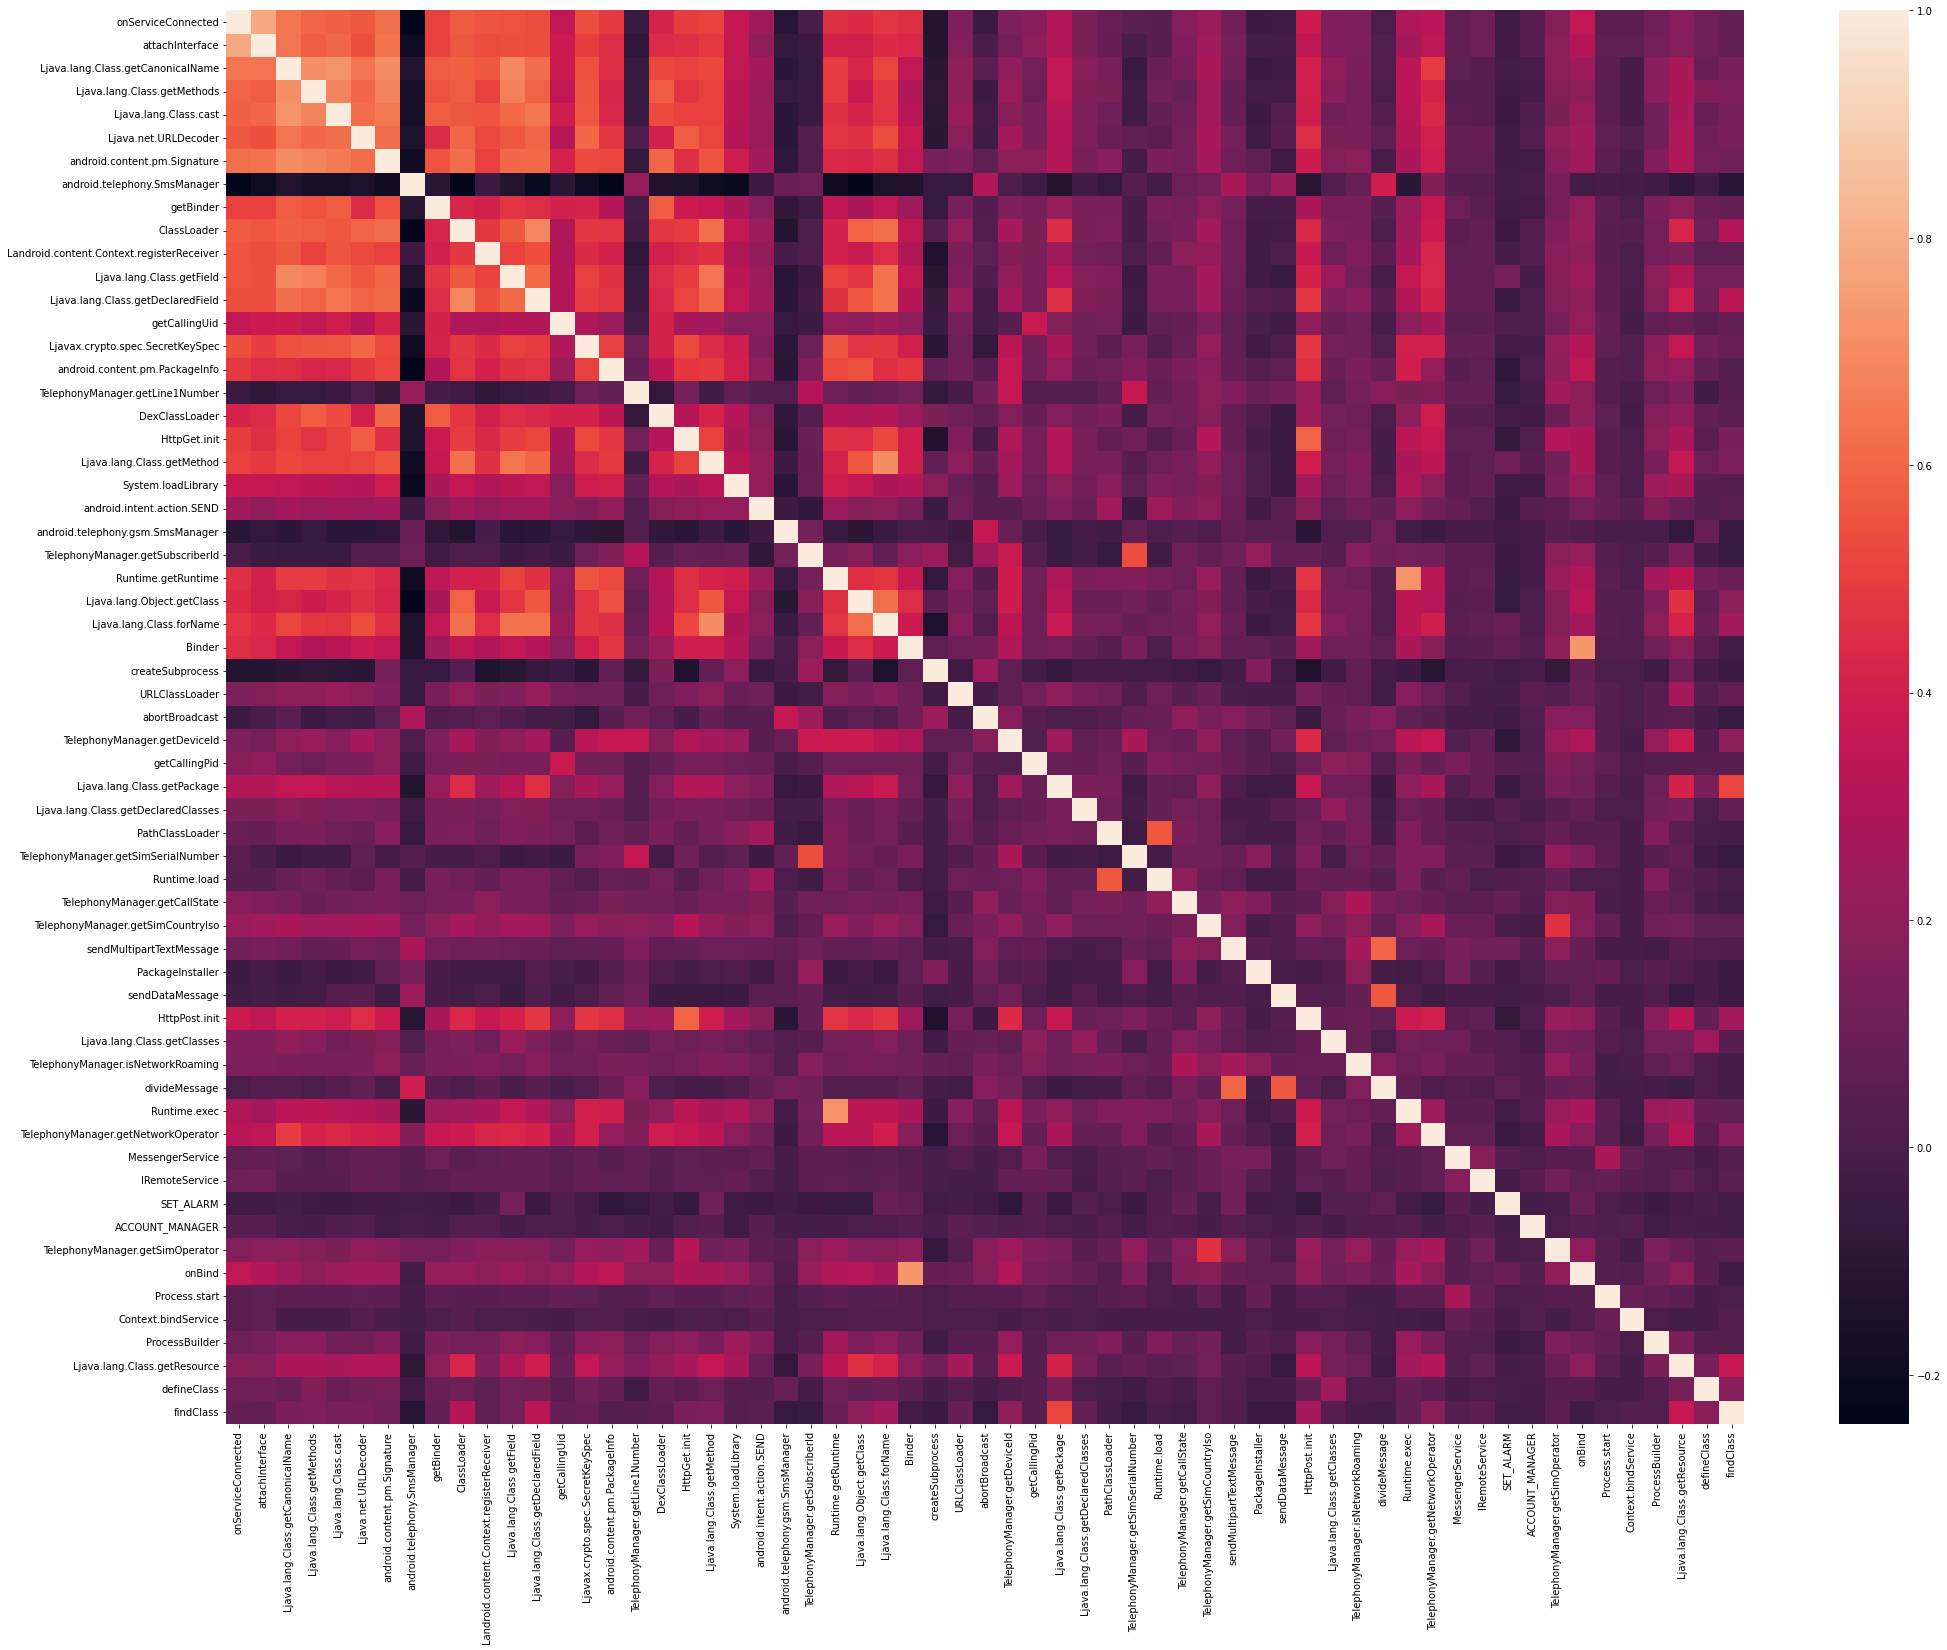

In [89]:
from matplotlib.pyplot import figure
# setting the size of figure
figure(figsize=(34, 26))
dataplot = sns.heatmap(X_train.corr())
plt.show()

In [90]:
# we are using XG Boost classifier model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=192)
y_pred = model.fit(X_train, y_train).predict_proba(X_test)
print('Test AUPRC = {}'.format(average_precision_score(y_test, y_pred[:,1])))

Test AUPRC = 0.9960582964872803


In [91]:
y_train_pred = model.predict_proba(X_train)
print('Train AUPRC = {}'.format(average_precision_score(y_train, y_train_pred[:,1])))

Train AUPRC = 0.998142669210452


In [92]:
y_train_pred[:,1]

array([0.  , 0.  , 0.  , ..., 0.05, 0.  , 0.05])

In [93]:
y_train_pred[:,1].round()

array([0., 0., 0., ..., 0., 0., 0.])

In [94]:
from sklearn.metrics import accuracy_score, f1_score
print('Train accuracy = {}'.format(accuracy_score(y_train, y_train_pred[:,1].round())))
print('Test accuracy = {}'.format(accuracy_score(y_test, y_pred[:,1].round())))
print('Train f1 score = {}'.format(f1_score(y_train, y_train_pred[:,1].round())))
print('Test f1 score = {}'.format(f1_score(y_test, y_pred[:,1].round())))

Train accuracy = 0.9927644710578842
Test accuracy = 0.98237445959428
Train f1 score = 0.9901461094121644
Test f1 score = 0.9757880310644129


In [95]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 192,
 'verbose': 0,
 'warm_start': False}

In [96]:
model.classes_

array([0, 1])

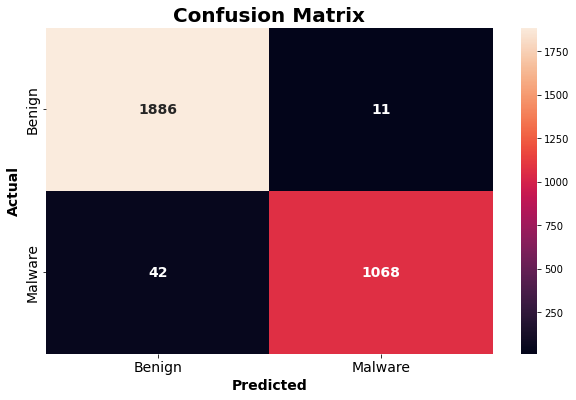

In [97]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

pred_probability = model.predict(X_test)
predictions = pred_probability > 0.5

plt.figure(figsize=(10,6))
plt.title('Confusion Matrix', size=20, weight='bold')
sns.heatmap(
     confusion_matrix(y_test, pred_probability, labels=model.classes_),
     annot=True,
     annot_kws={'size':14, 'weight': 'bold'},
     fmt='d',
     xticklabels=['Benign', 'Malware'],
     yticklabels=['Benign', 'Malware'])
plt.tick_params(axis='both', labelsize=14)
plt.ylabel('Actual', size=14, weight='bold')
plt.xlabel('Predicted', size=14, weight='bold')
plt.show()

In [98]:
# 0 is non fraud and 1 is fraud
print(classification_report(y_test, pred_probability, labels=model.classes_))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1897
           1       0.99      0.96      0.98      1110

    accuracy                           0.98      3007
   macro avg       0.98      0.98      0.98      3007
weighted avg       0.98      0.98      0.98      3007



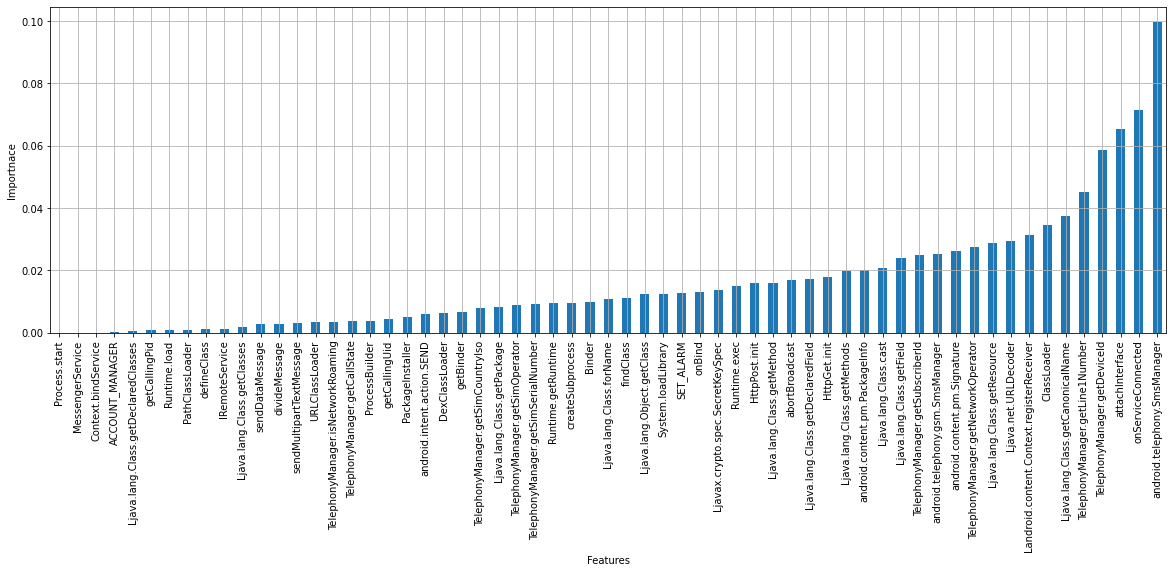

In [99]:
features = pd.Series(model.feature_importances_)
features.index = X_train.columns

# sort the features by importance
features.sort_values(ascending=True, inplace=True)

# plot
features.plot.bar(figsize=(20,6))
plt.xlabel('Features')
plt.ylabel('Importnace')
plt.grid()
plt.show()

In [100]:
from sklearn.metrics import r2_score
r2_full = r2_score(y_test, pred_probability)

In [101]:
from sklearn.metrics import r2_score
features_1 = list(features.index)
# the final step consists in removing one at a time
# all the features, from the least to the most important
# and build model at each round

# once, we build the model, we calculate the ne wr2
# if the new r2 is smaller than the original one
# (with all the features), then that feature that was 
# removed was important, and we should keep it
# otherwise, we should remove the feature

# recursive feature elimination:

# first we arbitrarily set the drop in r2, if the drop 
# is below this threshold, the feature will be removed

tol = 0.001

print('doing recursive feature elimination')

# we initialise a list where we will collect the features
# we should remove
features_to_remove = []

# set a counter to know which feature is being 
# evaluated
count = 1

# now we loop over all the features, in order of importance
# remember that features in the list are ordered by
# importance
for feature in features_1:
    print()
    print('testing feature: ', feature, count, ' out of ', len(features_1))
    count = count + 1
    
    # initialise model
    model_int = RandomForestClassifier(random_state=192)
    
    # fit model with all variables minus the removed features
    # and the features to be evaluated
    model_int.fit(
      X_train.drop(features_to_remove + [feature], axis=1), y_train)
    
    # make a prediction over the test set
    y_pred_test = model_int.predict(
      X_test.drop(features_to_remove + [feature], axis=1))
    
    # calculate the new r2
    r2_int = r2_score(y_test, y_pred_test)
    print('New Test r2 = {}'.format((r2_int)))
    
    # print the original r2 with all the features
    print('All features Test r2 = {}'.format((r2_full)))
    
    # determine the drop in r2
    diff_r2 = r2_full - r2_int
    
    # compare the drop in r2 with the tolerance we set previously
    if diff_r2 >= tol:
        print('Drop in r2 = {}'.format(diff_r2))
        print('Keep: ', feature)
        print
        
    else:
        print('Drop in r2 = {}'.format(diff_r2))
        print('remove: ', feature)
        print
        # if the drop in r2 is small and we remove the
        # feature, we need to set the new r2 to the one based on
        # the remaining features
        r2_full = r2_int
        
        # and append the feature to remove to the collecting list
        features_to_remove.append(feature)
        
# now the loop is finished, we evaluated all the features
print('DONE!!')
print('total features to remove: ', len(features_to_remove))

# determine the features to keep
features_to_keep = [x for x in features_1 if x not in 
                    features_to_remove]
print('total features to keep: ', len(features_to_keep))

doing recursive feature elimination

testing feature:  Process.start 1  out of  61
New Test r2 = 0.9271694994942228
All features Test r2 = 0.9243134014351727
Drop in r2 = -0.0028560980590500717
remove:  Process.start

testing feature:  MessengerService 2  out of  61
New Test r2 = 0.9300255975532729
All features Test r2 = 0.9271694994942228
Drop in r2 = -0.0028560980590500717
remove:  MessengerService

testing feature:  Context.bindService 3  out of  61
New Test r2 = 0.9243134014351727
All features Test r2 = 0.9300255975532729
Drop in r2 = 0.0057121961181001435
Keep:  Context.bindService

testing feature:  ACCOUNT_MANAGER 4  out of  61
New Test r2 = 0.9300255975532729
All features Test r2 = 0.9300255975532729
Drop in r2 = 0.0
remove:  ACCOUNT_MANAGER

testing feature:  Ljava.lang.Class.getDeclaredClasses 5  out of  61
New Test r2 = 0.9228853524056476
All features Test r2 = 0.9300255975532729
Drop in r2 = 0.007140245147625235
Keep:  Ljava.lang.Class.getDeclaredClasses

testing feature:  

New Test r2 = 0.9228853524056476
All features Test r2 = 0.9314536465827978
Drop in r2 = 0.008568294177150215
Keep:  Ljava.lang.Class.getMethods

testing feature:  android.content.pm.PackageInfo 45  out of  61
New Test r2 = 0.8971804698741969
All features Test r2 = 0.9314536465827978
Drop in r2 = 0.03427317670860097
Keep:  android.content.pm.PackageInfo

testing feature:  Ljava.lang.Class.cast 46  out of  61
New Test r2 = 0.9243134014351727
All features Test r2 = 0.9314536465827978
Drop in r2 = 0.007140245147625124
Keep:  Ljava.lang.Class.cast

testing feature:  Ljava.lang.Class.getField 47  out of  61
New Test r2 = 0.9243134014351727
All features Test r2 = 0.9314536465827978
Drop in r2 = 0.007140245147625124
Keep:  Ljava.lang.Class.getField

testing feature:  TelephonyManager.getSubscriberId 48  out of  61
New Test r2 = 0.9200292543465975
All features Test r2 = 0.9314536465827978
Drop in r2 = 0.011424392236200287
Keep:  TelephonyManager.getSubscriberId

testing feature:  android.teleph

In [102]:
features_to_keep
X_train = X_train[features_to_keep]
X_test = X_test[features_to_keep]

In [103]:
top_5_feats = features.sort_values(ascending=False)[:5].index

In [104]:
less_imp_feats = set(features_to_keep).difference(set(top_5_feats))
pca_feats = list(less_imp_feats)

In [105]:
# pca = PCA()
# X_train_ = X_train[X_train.columns[~(X_train.columns.isin(pca_feats))]]
# X_test_ = X_test[X_test.columns[~(X_test.columns.isin(pca_feats))]]
# # reset the index
# X_train_ = X_train_.reset_index(drop=True)
# X_test_ = X_test_.reset_index(drop=True)
# # fit the scaler
# pca.fit(X_train_)
# pc = np.cumsum(pca.explained_variance_ratio_)
# d = np.argmax(pc >= 0.95)+1
# d

5

In [106]:
# set up the pca 
pca = PCA(n_components=5)

X_train = X_train[X_train.columns[~(X_train.columns.isin(pca_feats))]]
X_test = X_test[X_test.columns[~(X_test.columns.isin(pca_feats))]]
# reset the index
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
# fit the scaler
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# transform numpy arrays to dataframe
X_train_scaled = pd.DataFrame(X_train_pca, 
                              columns=['pca_1_feats',
                                   'pca_2_feats',
                                   'pca_3_feats',
                                       'pca_4_feats',
                                       'pca_5_feats'
                                   ])
X_test_scaled = pd.DataFrame(X_test_pca,
                            columns=['pca_1_feats',
                                   'pca_2_feats',
                                   'pca_3_feats',
                                     'pca_4_feats',
                                     'pca_5_feats'
                                   ])

# Finally concatenating the normal and scaled features.
X_train_pca = pd.concat([X_train.reset_index(drop=True),
                          X_train_scaled.reset_index(drop=True)],
                         axis=1)
X_test_pca = pd.concat([X_test.reset_index(drop=True),
                         X_test_scaled.reset_index(drop=True)],
                        axis=1)
X_train_pca.shape, X_test_pca.shape

((12024, 11), (3007, 11))

In [107]:
X_train_10d = X_train_pca.iloc[:,:10] # Grabs all rows and first 10 columns
X_test_10d = X_test_pca.iloc[:,:10]

In [108]:
X_train_10d.shape

(12024, 10)

In [109]:
# we are using XG Boost classifier model
from sklearn.ensemble import RandomForestClassifier
model_top = RandomForestClassifier(random_state=192)
y_pred_top = model_top.fit(X_train_10d, y_train).predict_proba(X_test_10d)
print('Test AUPRC = {}'.format(average_precision_score(y_test, y_pred_top[:,1])))
y_train_pred_top = model_top.predict_proba(X_train_10d)
print('Train AUPRC = {}'.format(average_precision_score(y_train, y_train_pred_top[:,1])))

Test AUPRC = 0.9100736511566748
Train AUPRC = 0.9052873883165885


In [110]:
from sklearn.metrics import accuracy_score, f1_score
print('Accuracy of Train data using 10 features= {}'.format(accuracy_score(y_train, 
                                                                           y_train_pred_top[:,1].round())))
print('Accuracy of Test data using 10 features= {}'.format(accuracy_score(y_test, y_pred_top[:,1].round())))
print('Train f1 score = {}'.format(f1_score(y_train, y_train_pred_top[:,1].round())))
print('Test f1 score = {}'.format(f1_score(y_test, y_pred_top[:,1].round())))

Accuracy of Train data using 10 features= 0.8938789088489687
Accuracy of Test data using 10 features= 0.9015630196208846
Train f1 score = 0.849988243592758
Test f1 score = 0.8619402985074627


In [ ]:








from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

pred_probability = model_top.predict(X_test_top)
predictions = pred_probability > 0.5

plt.figure(figsize=(10,6))
plt.title('Confusion Matrix', size=20, weight='bold')
sns.heatmap(
     confusion_matrix(y_test_top, pred_probability, labels=model_top.classes_),
     annot=True,
     annot_kws={'size':14, 'weight': 'bold'},
     fmt='d',
     xticklabels=['Benign', 'Malware'],
     yticklabels=['Benign', 'Malware'])
plt.tick_params(axis='both', labelsize=14)
plt.ylabel('Actual', size=14, weight='bold')
plt.xlabel('Predicted', size=14, weight='bold')
plt.show()


# 0 is non fraud and 1 is fraud
print(classification_report(y_test_top, pred_probability, labels=model_top.classes_))

In [55]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95)+1
d

38

Text(0, 0.5, 'Explained Variance')

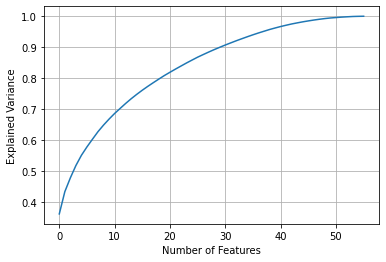

In [58]:
plt.plot(cumsum)
plt.grid()
plt.xlabel('Number of Features')
plt.ylabel('Explained Variance')

In [94]:
top_10_feats = features.sort_values(ascending=False)[:10].index

In [95]:
top_10_feats

Index(['android.telephony.SmsManager', 'onServiceConnected', 'attachInterface',
       'TelephonyManager.getDeviceId', 'TelephonyManager.getLine1Number',
       'Ljava.lang.Class.getCanonicalName', 'ClassLoader',
       'Landroid.content.Context.registerReceiver', 'Ljava.net.URLDecoder',
       'Ljava.lang.Class.getResource'],
      dtype='object')

In [97]:
len(set(features_to_keep).intersection(set(top_10_feats)))

10

In [98]:
updated_top_list=np.append(top_10_feats, cla)

In [99]:
updated_data = data[updated_top_list]

In [101]:
updated_data.shape

(15031, 11)

In [ ]:
# from sklearn.metrics import accuracy_score, f1_score
# # for accuracy both y and y_pred would be labels and not probability


# def check_evaluation_metrics(y, y_pred, p, prt_str = ''):
#     # this function is called in evaluate_lgbm function
#     # p = no of features ( used for adjusted R2)
#     # prt_str = string to be printed in output statements
    
# #     r2 = r2_score(y, y_pred)
# #     adj_r2 = 1 - (1-r2) * (len(y)-1) / (len(y)-p-1)
#     accuracy = accuracy_score(y, y_pred)
#     f1_scores = f1_score(y, y_pred)
    
    
# #     print(f'R2 score with {prt_str}: {r2}')
# #     print(f'Adjusted R2 score with {prt_str}: {adj_r2}')
#     print(f'accuracy score with {prt_str}: {accuracy}')
#     print(f'f1 score with {prt_str}: {f1_scores}')
    
#     return

In [ ]:
# def evaluate_rf(X, y, best_params):
#     model = RandomForestClassifier(
# #        learning_rate = best_params['m__learning_rate'],
#        max_depth = best_params['m__max_depth'],
#        n_estimators = best_params['m__n_estimators'],
# #        reg_alpha = best_params['m__reg_alpha'],
# #        reg_lambda = best_params['m__reg_lambda'],
# #        num_leaves = best_params['m__num_leaves']
#     )
#     pipeline = make_pipeline(#StandardScaler(),
#                              model)
#     folds = KFold(n_splits=5, shuffle=True, random_state=192)
#     y_pred = cross_val_predict(pipeline, X, y, cv=folds)
    
#     check_evaluation_metrics(y, y_pred,
#                             X.shape[1],
#                             prt_str = '5-folds & RF')
    
#     #do_plotting(y, y_pred, prt_str='5-fold & RF')
    
#     return

In [ ]:
# def run_RF(X, y):
#     # here the model is called with default parameters
#     model= RandomForestClassifier()
#     pipeline = Pipeline(steps = 
#                              [#('scaler', StandardScaler()),
#                              ('m', model)]
#                        )
#     param_grid = {
# #         "m__learning_rate": [ 0.0100, 0.1000, 1.0],
#         "m__max_depth": [-1,1, 2,3,4,  5,10],  
#         "m__n_estimators": [10,100, 150, 200],
# #         'm__reg_alpha': [10,20],
# #         'm__reg_lambda' : [10, 20],
# #         'm__num_leaves' : [10, 30]

#     }
#     # folds ensure that model is less biased in compare to the simple train test split    
#     folds = KFold(n_splits = 5, shuffle = True, random_state = 192)            
    
#     grid_search = GridSearchCV(
#         pipeline,
#         param_grid,
#         cv = folds,
#         n_jobs = -1,
#         scoring = make_scorer(root_mean_squared_error, greater_is_better= False),
#         verbose = 3,
#         refit= True,
#         return_train_score = True
#     )
    
#     grid_search.fit(X, y)
    
#     print('Best Hyperparameters: %s' % grid_search.best_params_)
    
#     best_params = grid_search.best_params_
        
#     result = grid_search.cv_results_
    
#     best_index = grid_search.best_index_
    
#     mean_test_score = result['mean_test_score']
#     mean_train_score = result['mean_train_score']
#     # getting mean test and train score for best parameters
#     mean_test_score_best = mean_test_score[best_index]
#     mean_train_score_best = mean_train_score[best_index]
    
#     print("Results of GRID Search CV-")
#     print("check train and val score for overfitting for the best params")
#     print(f"mean RMSE val scores for best params: {mean_test_score_best}")
#     print(f"mean RMSE train scores for best params: {mean_train_score_best}")
    
#     print(" ")
    
#     print("check train and val score for overfitting for all combinations of params")
#     print(f"mean RMSE val scores for all params: {mean_test_score}")
#     print(f"mean RMSE train scores for all params: {mean_train_score}")
    
    
#     #check evaluation metrics of the best model
#     print("Evaluation on train data with CV using best hyper-parameters found using gridsearchCV-")
#     evaluate_lgbm(X, y, best_params)
    
#     return result, grid_search.best_params_


In [113]:
# setting the seed to ensure reproducibility of results
np.random.seed(192)
# y is the traget variable
y_top = updated_data['class']
# X contains the input
X_top = updated_data.drop(columns=['class'])

In [114]:
# Splitting the data into train and test
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y_top, 
                            test_size=0.2, random_state=192)

In [ ]:
# result,b_p = run_LGBM(X_train, y_train)

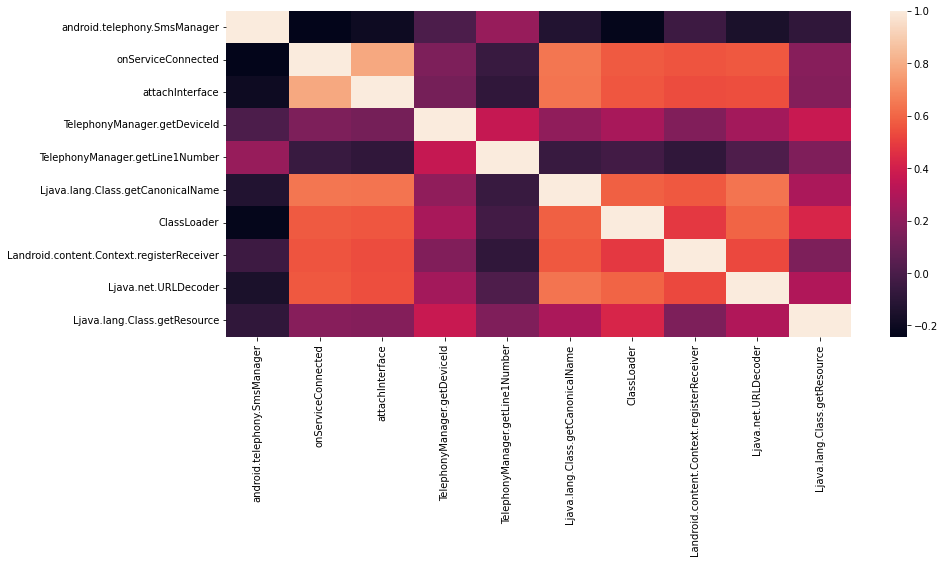

In [115]:
from matplotlib.pyplot import figure
# setting the size of figure
figure(figsize=(14, 6))
dataplot = sns.heatmap(X_train_top.corr())
plt.show()

In [116]:
# we are using XG Boost classifier model
from sklearn.ensemble import RandomForestClassifier
model_top = RandomForestClassifier(random_state=192)
y_pred_top = model_top.fit(X_train_top, y_train_top).predict_proba(X_test_top)
print('Test AUPRC = {}'.format(average_precision_score(y_test_top, y_pred_top[:,1])))

y_train_pred_top = model_top.predict_proba(X_train_top)
print('Train AUPRC = {}'.format(average_precision_score(y_train_top, y_train_pred_top[:,1])))

Test AUPRC = 0.9526572753561138
Train AUPRC = 0.9568526606910243


In [120]:
from sklearn.metrics import accuracy_score, f1_score
print('Accuracy of Train data using 10 features= {}'.format(accuracy_score(y_train_top, 
                                                                           y_train_pred_top[:,1].round())))
print('Accuracy of Test data using 10 features= {}'.format(accuracy_score(y_test_top, y_pred_top[:,1].round())))
print('Train f1 score = {}'.format(f1_score(y_train_top, y_train_pred_top[:,1].round())))
print('Test f1 score = {}'.format(f1_score(y_test_top, y_pred_top[:,1].round())))

Accuracy of Train data using 10 features= 0.9254823685961411
Accuracy of Test data using 10 features= 0.9195211173927502
Train f1 score = 0.895278167367929
Test f1 score = 0.888170055452865


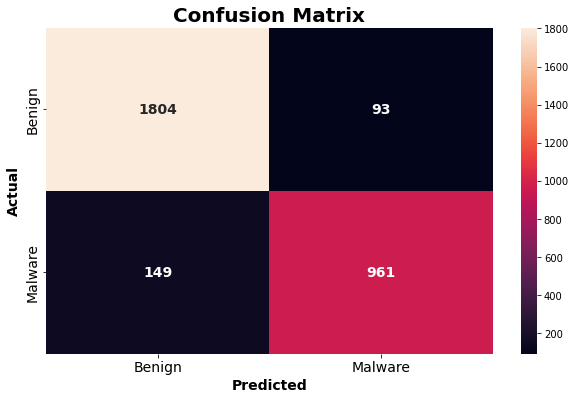

In [118]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

pred_probability = model_top.predict(X_test_top)
predictions = pred_probability > 0.5

plt.figure(figsize=(10,6))
plt.title('Confusion Matrix', size=20, weight='bold')
sns.heatmap(
     confusion_matrix(y_test_top, pred_probability, labels=model_top.classes_),
     annot=True,
     annot_kws={'size':14, 'weight': 'bold'},
     fmt='d',
     xticklabels=['Benign', 'Malware'],
     yticklabels=['Benign', 'Malware'])
plt.tick_params(axis='both', labelsize=14)
plt.ylabel('Actual', size=14, weight='bold')
plt.xlabel('Predicted', size=14, weight='bold')
plt.show()

In [119]:
# 0 is non fraud and 1 is fraud
print(classification_report(y_test_top, pred_probability, labels=model_top.classes_))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1897
           1       0.91      0.87      0.89      1110

    accuracy                           0.92      3007
   macro avg       0.92      0.91      0.91      3007
weighted avg       0.92      0.92      0.92      3007

